Text(0, 0.5, 'Modulo')

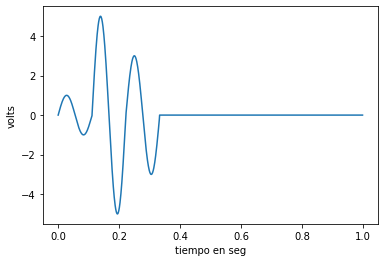

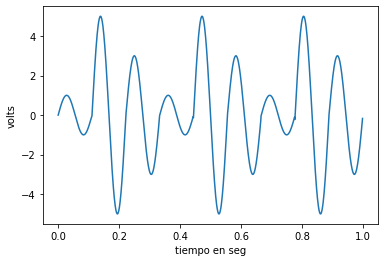

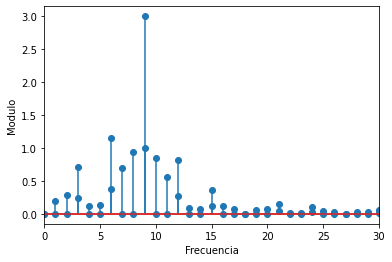

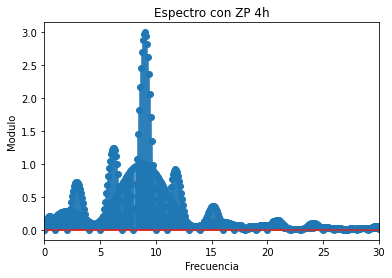

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from pandas import DataFrame
from IPython.display import HTML

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    signal = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, signal   

##############################################################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+100/9+9/9 = 3.33', '', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]
#############################################################################

#  xx: señal con tres ciclos ampitud 1 5 y 3
#  xx3 : xx con zero padding
#  xx4 : señal con 0 ciclos ( tres ciclos iguales de amplitudes 1 5 y 3) 
#  xx7: señal xx4 con zero Padding.
#  xx1,xx2,xx5,xx6 auxiliares

#############################################################################

N  = 1000        
fs = 1000        
df=fs/N    
            
a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2
f0 =9 * fs/N

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*N/f0):] = 0    # los : al final me indican llenar de ceros 
                        #los valores del vector xx mayores a N/f0

tt , xx1 = generador_senoidal(fs , f0 , N , 5*a0 , p0)
xx1[:int(1*N/f0)] = 0
xx1[int(2*N/f0):] = 0

tt , xx2 = generador_senoidal(fs , f0 , N , 3*a0 , p0)
xx2[:int(2*N/f0)] = 0 # llena de ceros para las posiciones anterires del vector xx2 en 2*N/f0
xx2[int(3*N/f0):] = 0 # llena de ceros para las posiciones posterires del vector xx2 en 3*N/f0

xx += xx1
xx += xx2

xx3 = np.concatenate((xx,np.zeros(N*10)))  #APLICO ZERO PADDING

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
#freq = np.arange(0 , fs , 1/N)
freq = np.fft.fftfreq(len(xx),1/N)

fftxx3 = fft(xx3)
fftxx3_abs = np.abs(fftxx3)/Norma
freq3 = np.fft.fftfreq(len(xx3),1/N)

##################################################################################

tt , xx4 = generador_senoidal(fs , f0 , N , a0 , p0)
xx4[int(1*N/f0):int(3*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx4[int(4*N/f0):int(6*N/f0)] = 0
xx4[int(7*N/f0):int(9*N/f0)] = 0

tt , xx5 = generador_senoidal(fs , f0 , N , 5*a0 , p0)
xx5[:int(1*N/f0)]=0
xx5[int(2*N/f0):int(4*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx5[int(5*N/f0):int(7*N/f0)] = 0
xx5[int(8*N/f0):] = 0

tt , xx6 = generador_senoidal(fs , f0 , N , 3*a0 , p0)
xx6[:int(2*N/f0)]=0
xx6[int(3*N/f0):int(5*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx6[int(6*N/f0):int(8*N/f0)] = 0



xx4 += xx5
xx4 += xx6

xx7 = np.concatenate((xx4,np.zeros(N*10)))  #APLICO ZERO PADDING


fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
#freq = np.arange(0 , fs , 1/N)
freq = np.fft.fftfreq(len(xx),1/N)

fftxx3 = fft(xx3)
fftxx3_abs = np.abs(fftxx3)/Norma
freq3 = np.fft.fftfreq(len(xx3),1/N)


fftxx4 = fft(xx4)
fftxx4_abs = np.abs(fftxx4)/Norma
#freq = np.arange(0 , fs , 1/N)
freq4 = np.fft.fftfreq(len(xx4),1/N)

fftxx7 = fft(xx7)
fftxx7_abs = np.abs(fftxx7)/Norma
freq7 = np.fft.fftfreq(len(xx7),1/N)

#################################################################################
plt.figure(1)
plt.plot(tt , xx )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')

plt.figure(2)
plt.plot(tt , xx4 )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')


plt.figure(3)
plt.stem(freq , fftxx_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')


plt.figure(4)
plt.stem(freq3 , fftxx3_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.title('Éspectro con ZP 4g')
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')


plt.figure(3)
plt.stem(freq4 , fftxx4_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

plt.figure(4)
plt.stem(freq7 , fftxx7_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.title('Espectro con ZP 4h')
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')